# Airline Data Analysis

# Bussiness Problem

Our company operates different types of airplanes, serving various clients by providing air transportation services. The main goal is to ensure that passengers have a safe, comfortable, and convenient journey. However, you're currently facing some challenges that are affecting the company's profitability.

These challenges include stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market resulting in higher labor costs. All of these factors are putting pressure on the company's profits.

To overcome these challenges, the company wants to increase its occupancy rate. The occupancy rate refers to the percentage of seats on each flight that are filled with passengers. By increasing the number of occupied seats, the company can generate more revenue and improve its average profit earned per seat.

To analyze the database, the company will review historical data related to flights, such as the number of seats available, the number of seats occupied, flight routes, and other relevant information. By analyzing this data, the company can identify trends and patterns that can help them make informed decisions on how to increase the occupancy rate.

Possible strategies to increase the occupancy rate may include adjusting pricing strategies, optimizing flight schedules, identifying popular routes, and improving marketing and customer service efforts. By implementing effective measures based on the analysis, the company can attract more passengers and maximize the utilization of available seats.

The ultimate goal is to find ways to increase the occupancy rate, which will lead to higher revenue and improved profitability, despite the challenges the company is currently facing.

# Main Challenges

One of the main challenges your company is facing is stricter environmental regulations. This means that there are now stricter rules and laws in place to protect the environment from the impact of aviation. These regulations require airlines to reduce their carbon emissions and operate in a more environmentally friendly way. However, implementing these changes can be costly for airlines as they need to invest in new technologies and practices to meet these regulations.

Another challenge is higher flight taxes. Governments around the world are imposing higher taxes on airlines to generate more revenue and address environmental concerns. These increased taxes directly impact the cost of flying, making it more expensive for passengers. As a result, the demand for air travel may decrease because people are less willing or able to pay higher prices for flights.

The aviation industry is also facing a tight labor market, which means there is a shortage of trained and skilled workers. This shortage of workers leads to increased labor costs for airlines. When there are fewer people available for certain job positions, companies have to offer higher salaries and benefits to attract and retain employees. This increased labor cost can put pressure on the company's overall profitability.

Moreover, the tight labor market also results in higher turnover rates. This means that employees may leave their jobs more frequently to seek better opportunities elsewhere. High turnover rates can be costly for companies as they need to spend time and resources on recruiting, training, and onboarding new employees.

In summary, the aviation industry is facing challenges such as stricter environmental regulations, higher flight taxes, a tight labor market, and increased labor costs. These challenges impact the profitability of airlines and require companies to find innovative solutions to adapt to the changing landscape.

# Objective

The first objective is to increase the occupancy rate. Occupancy rate refers to the percentage of seats on flights that are filled with passengers. By increasing the occupancy rate, we aim to have more passengers on each flight, which can help generate more revenue and profit for the airline. This can be achieved by identifying opportunities to fill seats on flights that are currently underperforming or have low passenger numbers.

The second objective is to improve the pricing strategy. This means developing a strategy for setting ticket prices that takes into account the current market conditions, such as demand and competition, as well as customer preferences. By having a well-designed pricing strategy, the airline can attract and retain customers by offering competitive prices that meet their expectations.

The third objective is to enhance the customer experience. This involves focusing on providing a seamless and convenient experience for customers throughout their journey, from booking the flight to arriving at their destination. By delivering excellent customer service, personalized experiences, and convenient processes, the airline can differentiate itself from competitors and increase customer loyalty. Satisfied and loyal customers are more likely to choose the airline for their future travel needs.

The ultimate goal of these objectives is to identify opportunities to increase the occupancy rate on flights that are currently not performing well. By filling more seats on these flights, the airline can maximize its revenue and profitability. This can be achieved through a combination of improved pricing strategies, enhanced customer experience, and targeted marketing efforts to attract more passengers to these flights.

By focusing on these objectives, the airline aims to address the challenges it is facing and find ways to increase profitability in a competitive and changing industry.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [3]:
cursor.execute("""Select name from sqlite_master where type = 'table';""")
print("Table List")
table_list = [table[0] for table in cursor.fetchall()]
table_list

Table List


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [4]:
%reload_ext sql

In [5]:
%sql sqlite:///travel.sqlite

'Connected: @travel.sqlite'

In [6]:
%%sql
select * from aircrafts_data LIMIT 10

 * sqlite:///travel.sqlite
Done.


aircraft_code,model,range
773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суперджет-100""}",3000
320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-200""}",5700
321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-200""}",5600
319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-100""}",6700
733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208 Караван""}",1200
CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье CRJ-200""}",2700


In [7]:
aircraft_data=pd.read_sql('select * from aircrafts_data', connection)

In [8]:
%%sql
select * from airports_data LIMIT 10

 * sqlite:///travel.sqlite
Done.


airport_code,airport_name,city,coordinates,timezone
YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабаровск-Новый""}","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-Камчатский""}","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хомутово""}","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахалинск""}","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
VVO,"{""en"": ""Vladivostok International Airport"", ""ru"": ""Владивосток""}","{""en"": ""Vladivostok"", ""ru"": ""Владивосток""}","(132.147994995117188,43.3989982604980469)",Asia/Vladivostok
LED,"{""en"": ""Pulkovo Airport"", ""ru"": ""Пулково""}","{""en"": ""St. Petersburg"", ""ru"": ""Санкт-Петербург""}","(30.2625007629394531,59.8003005981445312)",Europe/Moscow
KGD,"{""en"": ""Khrabrovo Airport"", ""ru"": ""Храброво""}","{""en"": ""Kaliningrad"", ""ru"": ""Калининград""}","(20.5925998687744141,54.8899993896484375)",Europe/Kaliningrad
KEJ,"{""en"": ""Kemerovo Airport"", ""ru"": ""Кемерово""}","{""en"": ""Kemorovo"", ""ru"": ""Кемерово""}","(86.1072006225585938,55.2700996398925781)",Asia/Novokuznetsk
CEK,"{""en"": ""Chelyabinsk Balandino Airport"", ""ru"": ""Челябинск""}","{""en"": ""Chelyabinsk"", ""ru"": ""Челябинск""}","(61.503300000000003,55.3058010000000024)",Asia/Yekaterinburg


In [9]:
airport_data=pd.read_sql('select * from airports_data', connection)

In [10]:
%%sql
select * from boarding_passes LIMIT 10

 * sqlite:///travel.sqlite
Done.


ticket_no,flight_id,boarding_no,seat_no
0005435212351,30625,1,2D
0005435212386,30625,2,3G
0005435212381,30625,3,4H
0005432211370,30625,4,5D
0005435212357,30625,5,11A
0005435212360,30625,6,11E
0005435212393,30625,7,11H
0005435212374,30625,8,12E
0005435212365,30625,9,13D
0005435212378,30625,10,14H


In [11]:
boarding_passes=pd.read_sql('select * from boarding_passes', connection)

In [12]:
%%sql
select * from bookings LIMIT 10

 * sqlite:///travel.sqlite
Done.


book_ref,book_date,total_amount
00000F,2017-07-05 03:12:00+03,265700
000012,2017-07-14 09:02:00+03,37900
000068,2017-08-15 14:27:00+03,18100
000181,2017-08-10 13:28:00+03,131800
0002D8,2017-08-07 21:40:00+03,23600
0002DB,2017-07-29 06:30:00+03,101500
0002E0,2017-07-11 16:09:00+03,89600
0002F3,2017-07-10 05:31:00+03,69600
00034E,2017-08-04 16:52:00+03,73300
000352,2017-07-06 02:02:00+03,109500


In [13]:
bookings=pd.read_sql('select * from bookings', connection)

In [14]:
%%sql
select * from flights LIMIT 10

 * sqlite:///travel.sqlite
Done.


flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
7784,PG0667,2017-09-10 15:00:00+03,2017-09-10 17:30:00+03,SVO,KRO,Scheduled,CR2,\N,\N
9478,PG0360,2017-08-28 09:00:00+03,2017-08-28 11:35:00+03,LED,REN,Scheduled,CR2,\N,\N
11085,PG0569,2017-08-24 15:05:00+03,2017-08-24 16:10:00+03,SVX,SCW,Scheduled,733,\N,\N
11847,PG0498,2017-09-12 10:15:00+03,2017-09-12 14:55:00+03,KZN,IKT,Scheduled,319,\N,\N
12012,PG0621,2017-08-26 16:05:00+03,2017-08-26 17:00:00+03,KZN,MQF,Scheduled,CR2,\N,\N


In [15]:
flights=pd.read_sql('select * from flights', connection)

In [16]:
%%sql
select * from seats LIMIT 10

 * sqlite:///travel.sqlite
Done.


aircraft_code,seat_no,fare_conditions
319,2A,Business
319,2C,Business
319,2D,Business
319,2F,Business
319,3A,Business
319,3C,Business
319,3D,Business
319,3F,Business
319,4A,Business
319,4C,Business


In [17]:
seats=pd.read_sql('select * from seats', connection)

In [18]:
%%sql
select * from ticket_flights LIMIT 10

 * sqlite:///travel.sqlite
Done.


ticket_no,flight_id,fare_conditions,amount
0005432159776,30625,Business,42100
0005435212351,30625,Business,42100
0005435212386,30625,Business,42100
0005435212381,30625,Business,42100
0005432211370,30625,Business,42100
0005435212357,30625,Comfort,23900
0005435212360,30625,Comfort,23900
0005435212393,30625,Comfort,23900
0005435212374,30625,Comfort,23900
0005435212365,30625,Comfort,23900


In [19]:
ticket_flights=pd.read_sql('select * from ticket_flights', connection)

In [20]:
%%sql
select * from tickets LIMIT 10

 * sqlite:///travel.sqlite
Done.


ticket_no,book_ref,passenger_id
0005432000987,06B046,8149 604011
0005432000988,06B046,8499 420203
0005432000989,E170C3,1011 752484
0005432000990,E170C3,4849 400049
0005432000991,F313DD,6615 976589
0005432000992,F313DD,2021 652719
0005432000993,F313DD,0817 363231
0005432000994,CCC5CB,2883 989356
0005432000995,CCC5CB,3097 995546
0005432000996,1FB1E4,6866 920231


In [21]:
tickets=pd.read_sql('select * from tickets', connection)

# Retriving column name

In [22]:
for table in table_list:
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

# Checking null values

In [23]:
for table in table_list:
    print('\nTable', table)
    df_table=pd.read_sql(f'select * from {table}', connection)
    print(df_table.isnull().sum())


Table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

Table tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

In [24]:
#How many planes have more than 100 seats?
%sql select aircraft_code, count(*) as count from seats group by aircraft_code having count >100

 * sqlite:///travel.sqlite
Done.


aircraft_code,count
319,116
320,140
321,170
733,130
763,222
773,402


In [25]:
#How the number of tickets booked and total amount earned changed with the time?


In [26]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", connection)

In [27]:
tickets.dtypes

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [28]:
tickets['book_date'] = pd.to_datetime(tickets['book_date'])

In [29]:
tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [30]:
tickets['date'] = tickets['book_date'].dt.date

In [31]:
tickets_count = tickets.groupby('date')[['date']].count()

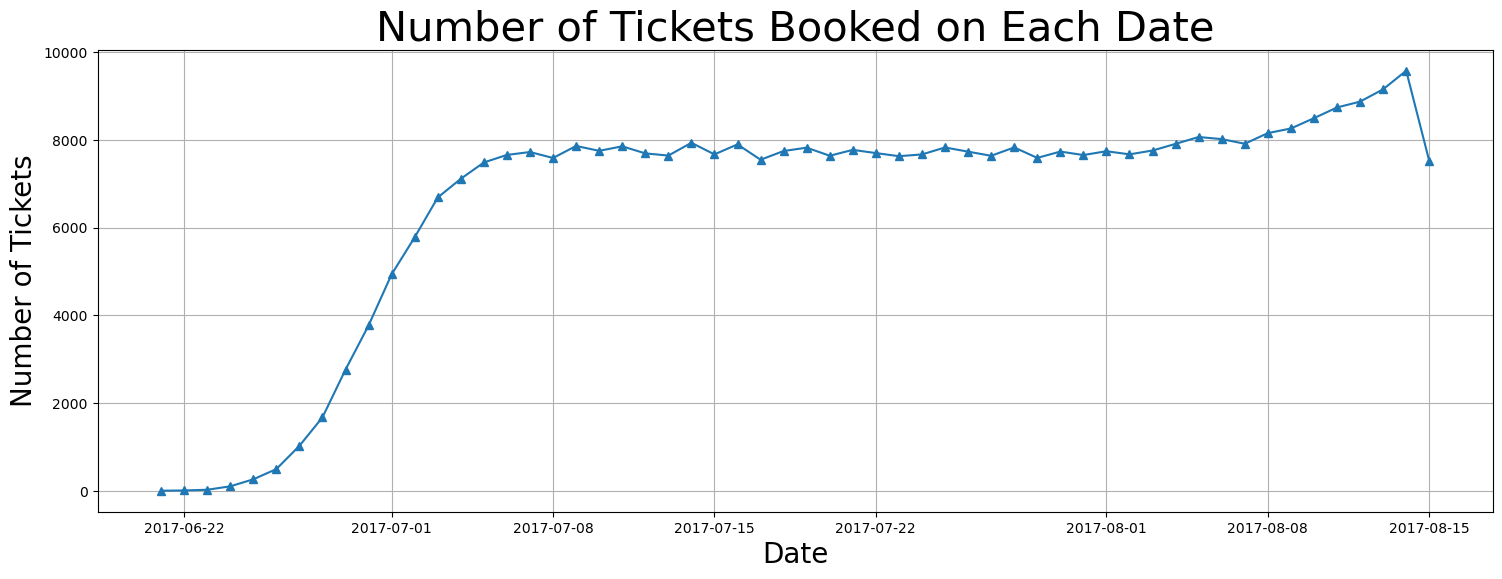

In [38]:
plt.figure(figsize=(18,6))
plt.plot(tickets_count.index, tickets_count['date'], marker= '^')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

In [35]:
bookings=pd.read_sql('select * from bookings', connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


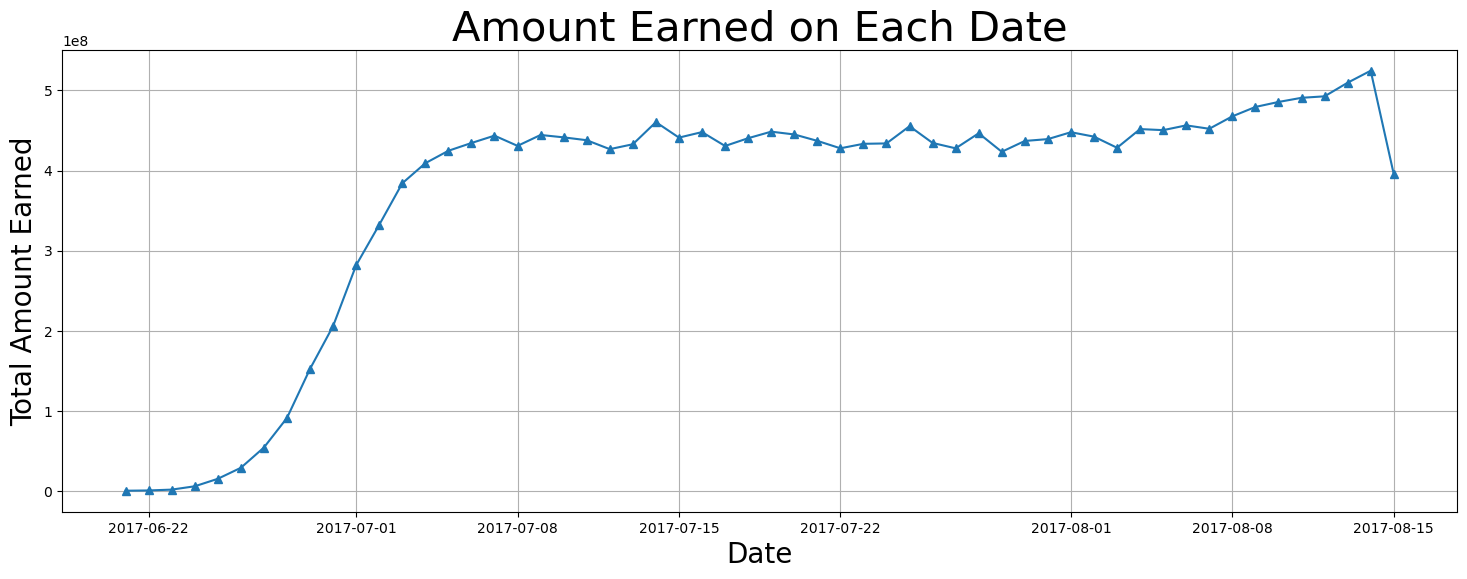

In [39]:
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
booking_amount = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(booking_amount.index, booking_amount['total_amount'], marker = '^')
plt.title('Amount Earned on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

In [36]:
#Calculate the average charges for each aircraft with different fare conditions?

In [43]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) 
                        from ticket_flights inner join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", connection)

In [44]:
df.shape

(15, 3)

In [45]:
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


In [47]:
import seaborn as sns

<AxesSubplot:xlabel='aircraft_code', ylabel='avg(amount)'>

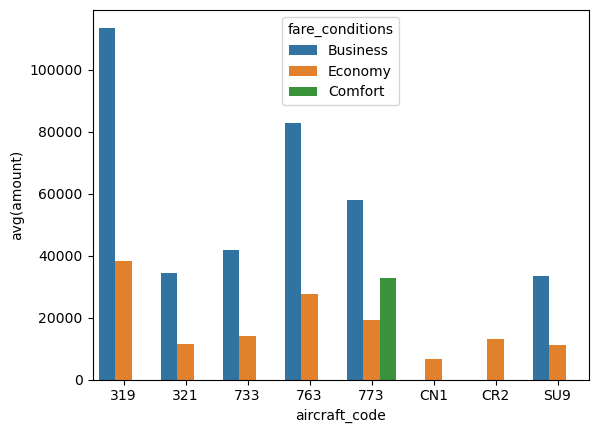

In [51]:
sns.barplot(data=df, x='aircraft_code', y='avg(amount)', hue='fare_conditions')

# Analyzing Occupancy Rate

In [ ]:
#For each aircraft, calculate the total revenue per year and the average revenue per ticket.

In [54]:
revenue = pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,
                    total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", connection)
revenue

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


In [ ]:
#Calculate the average occupancy per aircraft

In [56]:
a= pd.read_sql("""select aircraft_code,flights.flight_id, count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id""", connection)
a

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [60]:
b=pd.read_sql_query('select aircraft_code,count(*) as num_seats from seats group by aircraft_code', connection)
b

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [67]:
occupancy_rate= pd.read_sql("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats,
                    avg(a.seats_count)/b.num_seats as occupancy_rate from                   
                    (select aircraft_code, flights.flight_id, count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id) as a 
                    inner join 
                    (select aircraft_code,count(*) as num_seats from seats group by aircraft_code) as b
                    on a.aircraft_code= b.aircraft_code group by a.aircraft_code""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


In [ ]:
#Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [68]:
occupancy_rate['inc_occupancy_rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [69]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [73]:
occupancy_rate['inc_Total_Annual_Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc_occupancy_rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_occupancy_rate,inc_Total_Annual_Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


In [72]:
pd.set_option('display.float_format', str)

Analyzing revenue data such as total revenue per year, average revenue per ticket, and average occupancy per aircraft is crucial for airlines to maximize their profitability. By examining these indicators, airlines can identify areas for improvement and make adjustments to their pricing and route plans. Increasing the occupancy rate is particularly important as it allows airlines to generate more revenue while minimizing costs associated with empty seats. However, it's essential for airlines to strike a balance between profitability and providing excellent customer service and maintaining safety standards.

It's important for airlines to carefully consider the pricing of each aircraft. Setting reasonable prices that take into account the condition and facilities of the aircraft is crucial. Prices should not be too low or too high, as this can affect customer decision-making. Finding the right balance in pricing will help attract more passengers and increase profitability.

It's important for airlines to prioritize customer satisfaction and safety alongside their profit goals. By adopting a data-driven approach to revenue analysis and optimization, airlines can achieve long-term success in the highly competitive aviation industry. This involves making informed decisions based on revenue data and continually striving to deliver high-quality service while adhering to safety regulations.